In [1]:
with open('../../data/kaggle.json') as f:
  x = eval(f.read())

import os
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
# kaggle.json 파일 열어서 user명과 key값 확인
os.environ['KAGGLE_USERNAME'] = x['username']
os.environ['KAGGLE_KEY'] = x['key']

In [3]:
!kaggle datasets download aljarah/xAPI-Edu-Data



  0%|          | 0.00/5.54k [00:00<?, ?B/s]
100%|██████████| 5.54k/5.54k [00:00<00:00, 5.66MB/s]


In [4]:
import os
 
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
 
createFolder('./zip')

In [6]:
import zipfile
fantasy_zip = zipfile.ZipFile('xAPI-Edu-Data.zip')
fileName=fantasy_zip.namelist()[0]
fantasy_zip.extract(fileName,'./zip')

'zip\\xAPI-Edu-Data.csv'

### 데이터 셋 설명
- 성별(gender) : 학생의 성별(명목: '남성' 또는 '여성')
- 국적(NationalITy) : 학생의 국적(명목:'쿠웨이트','레바논','이집트','사우디아라비아','미국','요르단','
베네수엘라','이란','튀니스','모로코','시리아 ',' 팔레스타인', '이라크', '리비아')
- 출생지(PlaceofBirth) : 학생의 출생지(명칭:'쿠웨이트','레바논','이집트','사우디아라비아','미국','요르단','
베네수엘라','이란','튀니스','모로코 ','시리아','팔레스타인','이라크','리비아')
- 교육 단계(StageID) : 교육 수준 학생이 속한 (명목: '하위', '중학교', '고등학교')

- 학년 수준(GradeID) : 학년 학생이 속한 (명목: 'G-01', 'G-02', 'G-03', 'G-04', 'G-05', 'G-06', 'G-07 ', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12')

- 섹션 ID(SectionID) : 학급 학생이 속한(명칭:'A','B','C')

- 주제(Topic) : 과정 주제(명목:'영어','스페인어', '프랑스어','아랍어','IT','수학','화학', '생물학', '과학','역사',' 꾸란 ',' 지질학')

- 학기(Semester) : 학년도 학기(명목:'첫 번째','두 번째')

- 학생을 책임지는 학부모(Relation) : (명칭: '엄마', '아빠')()

- 들린 손(raisedhands) : 학생이 교실에서 손을 든 횟수(숫자:0-100)

- 방문한 리소스(VisITedResources) : 학생이 코스 콘텐츠를 방문한 횟수(숫자:0-100)

- 공지사항 보기(AnnouncementsView) : 학생이 새 공지사항을 확인하는 횟수(숫자:0-100)

- 토론 그룹(Discussion) : 학생이 토론 그룹에 참여하는 횟수(숫자:0-100)

- 학부모 응답 설문조사(ParentAnsweringSurvey) : 학부모가 학교에서 제공한 설문조사에 응답했는지 여부
(명목: '예', '아니오')

- 학부모 학교 만족도ParentschoolSatisfaction : 학부모의 학교 만족도(명목:'예','아니오')

- 결석일수(StudentAbsenceDays) : 학생별 결석일수(명목 : 7세 이상, 7세 미만)
- class : 성적

In [12]:
import pandas as pd
from glob import glob

df=pd.read_csv(glob('./zip/xAPI-Edu-Data.csv')[0])
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [14]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [15]:
df[df.raisedhands==100]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
95,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,100,80,2,70,No,Bad,Under-7,H
138,F,Jordan,Egypt,MiddleSchool,G-07,A,Quran,F,Mum,100,80,95,90,No,Bad,Under-7,H
139,M,Jordan,USA,MiddleSchool,G-07,A,Quran,F,Mum,100,85,85,70,No,Bad,Under-7,M
146,F,lebanon,lebanon,MiddleSchool,G-07,A,Quran,S,Mum,100,75,50,70,Yes,Good,Under-7,H
149,F,Jordan,lebanon,MiddleSchool,G-07,A,Quran,S,Mum,100,75,50,70,Yes,Bad,Under-7,H
152,F,SaudiArabia,USA,HighSchool,G-11,B,Science,S,Father,100,91,98,40,Yes,Bad,Under-7,H


In [16]:
df.gender.value_counts()

M    305
F    175
Name: gender, dtype: int64

In [19]:
count_list = ['gender', 'PlaceofBirth', 'NationalITy']

for i in count_list:
    print(f'{i}valuecount------------------------')
    print(df[i].value_counts())


gendervaluecount------------------------
M    305
F    175
Name: gender, dtype: int64
PlaceofBirthvaluecount------------------------
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64
NationalITyvaluecount------------------------
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64


array([[<AxesSubplot:title={'center':'raisedhands'}>,
        <AxesSubplot:title={'center':'VisITedResources'}>],
       [<AxesSubplot:title={'center':'AnnouncementsView'}>,
        <AxesSubplot:title={'center':'Discussion'}>]], dtype=object)

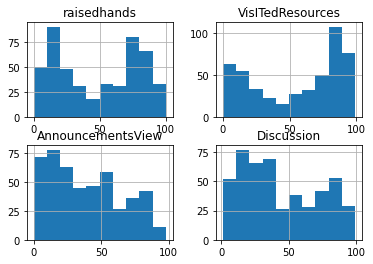

In [20]:
## 데이터 컬럼중 수치형 데이터 확인하고 자동으로 히스토 그램 그리세요
df.hist()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

raisedhandshist-------------------


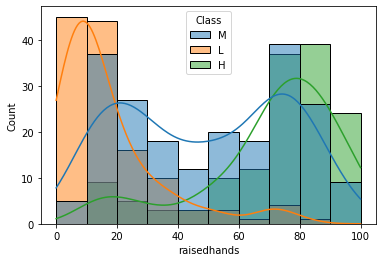

VisITedResourceshist-------------------


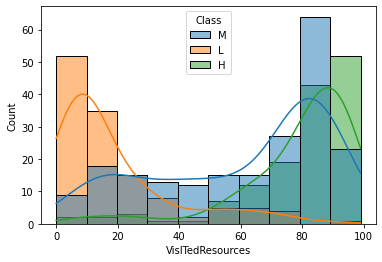

AnnouncementsViewhist-------------------


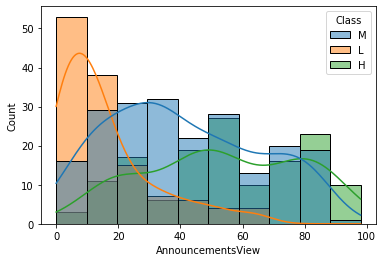

Discussionhist-------------------


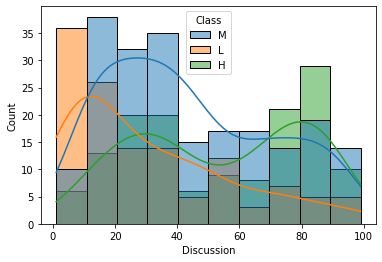

In [25]:
hist_list = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
import seaborn as sns
import matplotlib.pyplot as plt
for x in hist_list:
    print(f'{x}hist-------------------')
    sns.histplot(data=df, x=x, hue='Class', kde=True)
    plt.show()

In [ ]:
# joinplot, 손든횟수랑, 공지사항을 본 횟수간의 차트를 작성

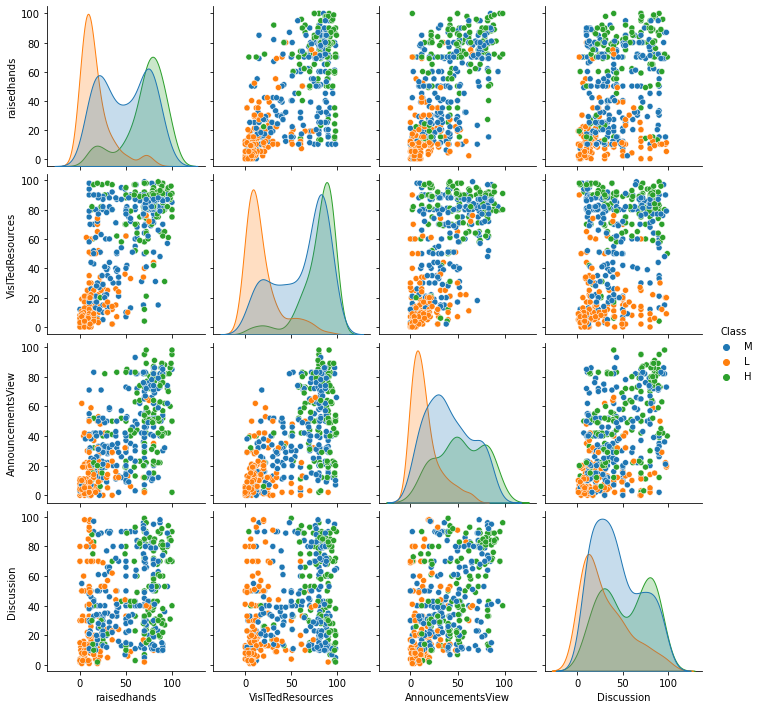

In [26]:
sns.pairplot(hue='Class', data=df)

In [33]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

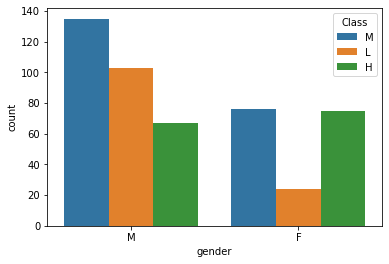

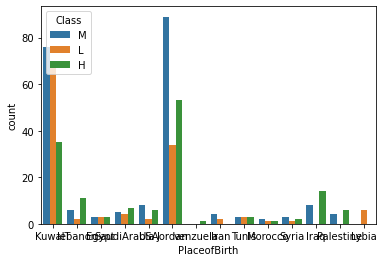

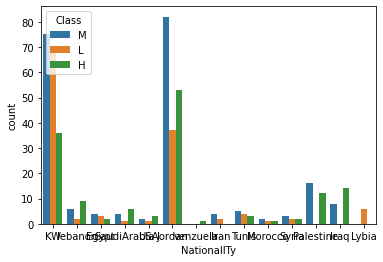

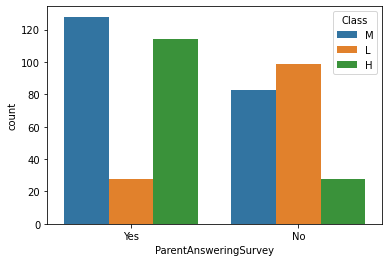

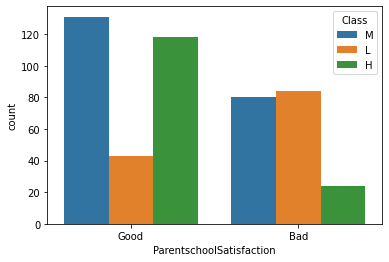

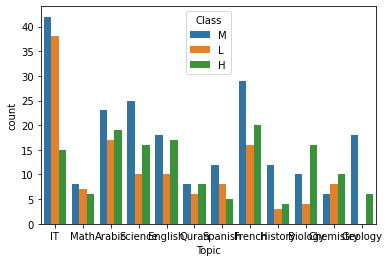

In [35]:
count_plot_list = ['gender', 'PlaceofBirth', 'NationalITy', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'Topic']
for x in count_plot_list:
    sns.countplot(x =x,hue='Class', data=df)
    plt.show()

In [38]:
# 범주형 자료 값들을 변화
# y값이 class L,M, H로 되어 있는 레벨 인코딩으로 1,2,0으로 됨(알파벳 순서)

df['Class_value'] = df['Class'].map(dict(L=-1,M=0,H=1))#map 통해서 바꾸기

<BarContainer object of 2 artists>

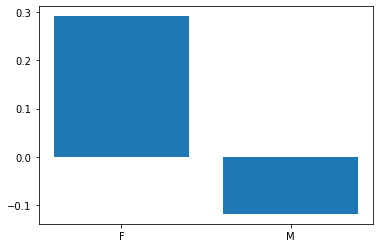

In [41]:
tmp = df.groupby('gender').mean()['Class_value']
plt.bar(tmp.index, tmp)

<BarContainer object of 12 artists>

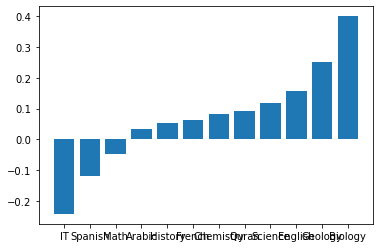

In [47]:
tmp = df.groupby('Topic').mean()['Class_value'].sort_values()
plt.bar(tmp.index, tmp,)

In [49]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# Hint) Multicollinearity를 피하기 위해 drop_first=True로 설정

X = pd.get_dummies(df.drop(['ParentschoolSatisfaction', 'Class', 'Class_value'], axis=1),
                   columns=['gender', 'NationalITy', 'PlaceofBirth',
                            'StageID', 'GradeID','SectionID', 'Topic',
                            'Semester', 'Relation', 'ParentAnsweringSurvey',
                            'StudentAbsenceDays'],
                   drop_first=True)
y = df['Class']


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=222)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((336, 59), (144, 59), (336,), (144,))

In [52]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

C:\Users\TH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

array(['H', 'H', 'H', 'L', 'H', 'L', 'L', 'L', 'L', 'L', 'L', 'M', 'M',
       'M', 'M', 'M', 'L', 'H', 'M', 'L', 'H', 'L', 'L', 'H', 'L', 'H',
       'L', 'H', 'M', 'M', 'M', 'M', 'M', 'L', 'L', 'L', 'L', 'H', 'M',
       'M', 'L', 'M', 'H', 'H', 'L', 'L', 'H', 'H', 'L', 'M', 'M', 'L',
       'H', 'H', 'L', 'M', 'L', 'M', 'L', 'H', 'M', 'M', 'L', 'M', 'M',
       'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'H', 'L', 'L', 'M', 'M',
       'M', 'H', 'H', 'H', 'M', 'L', 'H', 'H', 'H', 'H', 'L', 'H', 'L',
       'M', 'M', 'M', 'M', 'H', 'L', 'H', 'H', 'M', 'H', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'L', 'L', 'M', 'M', 'M', 'M', 'L', 'H', 'M',
       'M', 'L', 'M', 'L', 'H', 'L', 'H', 'L', 'L', 'H', 'L', 'M', 'M',
       'M', 'H', 'M', 'H', 'L', 'H', 'H', 'M', 'M', 'H', 'M', 'H', 'M',
       'M'], dtype=object)

In [55]:
#리포트 출력
from sklearn.metrics import classification_report
pred = model_lr.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           H       0.63      0.79      0.70        34
           L       0.88      0.82      0.85        45
           M       0.75      0.68      0.71        65

    accuracy                           0.75       144
   macro avg       0.75      0.76      0.75       144
weighted avg       0.76      0.75      0.75       144



In [57]:
X_train

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
441,90,86,85,10,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1
341,17,80,13,10,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
64,0,5,7,2,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
424,90,79,76,79,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
331,35,2,29,33,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,25,10,19,30,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14,62,70,44,60,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
115,0,8,11,70,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
45,20,12,15,70,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [56]:
## xgboost모델
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
pred = model_xg.predict(X_test)
print(classification_report(y_test,pred))

[17:42:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           H       0.70      0.88      0.78        34
           L       0.85      0.87      0.86        45
           M       0.82      0.69      0.75        65

    accuracy                           0.79       144
   macro avg       0.79      0.81      0.80       144
weighted avg       0.80      0.79      0.79       144



C:\Users\TH\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [61]:
## 각 변수의 기여도(모델계수)
model_lr.classes_
model_lr.coef_.shape, X_train.shape # x데이터의 w값 변수들의 계수가 59
#이때 coef_ 즉 w가 높으면 기여도가 높다 볼수 있다
# w가 총 3개이다

((3, 59), (336, 59))

In [67]:
X_train.columns
model_lr.coef_[0,:]

array([ 3.10925893e-02,  1.54119225e-02,  1.84199489e-02,  4.62943175e-03,
       -1.03859169e+00, -1.24866513e-01,  4.42076472e-02, -3.96549686e-01,
       -3.35536758e-01, -6.11736749e-02,  1.03275502e-02, -2.40088366e-01,
        3.20690844e-02, -1.38896123e-01, -1.06382410e-01, -7.66688534e-04,
       -1.18709578e-01,  3.56826995e-02, -1.24866513e-01,  4.42076472e-02,
       -8.38185660e-01, -2.49531184e-01, -6.11736749e-02,  1.03275502e-02,
       -6.84301887e-02,  1.95232575e-01, -1.25193444e-01, -9.09502632e-03,
       -1.58884756e-01, -8.98897570e-02,  3.56826995e-02, -6.58873224e-01,
       -5.31266444e-01, -2.89921939e-01, -5.90660236e-02,  2.55588798e-02,
       -2.81845746e-01, -4.02586358e-01, -1.36163827e-01, -2.54660690e-02,
       -1.54181060e-01, -1.40160091e-01,  9.76597797e-02, -2.30239589e-01,
        2.79162468e-01,  3.35117892e-02, -1.58777653e-01, -5.10272265e-01,
       -3.24612168e-01, -2.34383231e-01, -2.98128803e-01,  1.45026182e-01,
       -2.20497136e-01, -

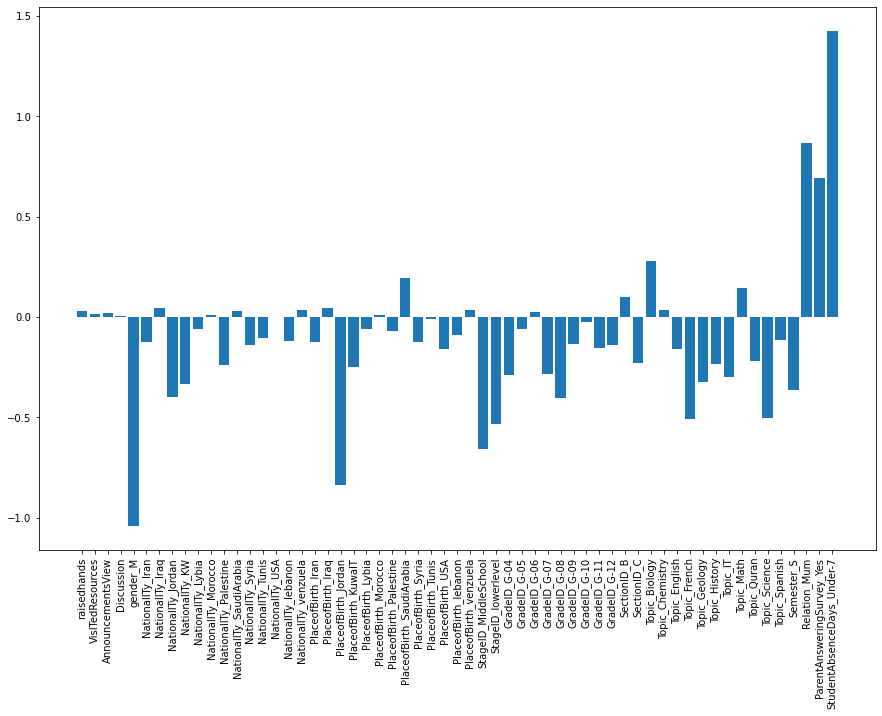

In [76]:
plt.figure(figsize=(15,10))
plt.bar(X_train.columns, model_lr.coef_[0])
plt.xticks(rotation=90) #x축 변수 제목 넒게 보기

plt.show()